In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

import pandas as pd
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns

In [3]:
HIV_df = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report (1).csv")
HIV_df.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51.0,99999.0,7.0,63.0,32.0,99999.0,99999.0,55.0,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1,1.4,1.4,0.0


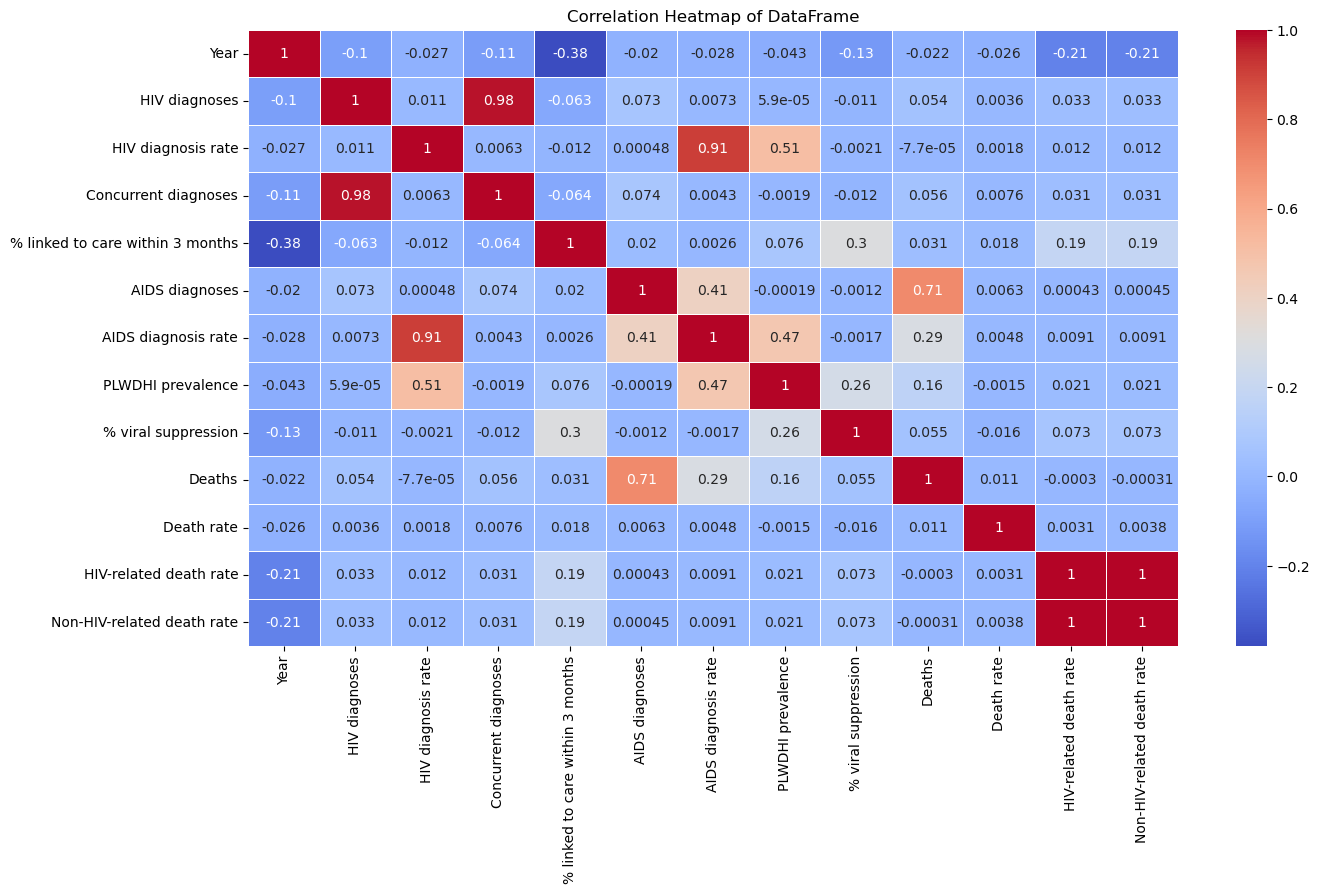

In [4]:
# Replace 'All' with NaN
HIV_df.replace('All', np.nan, inplace=True)

# Convert non-numeric columns to numeric
for column in HIV_df.columns:
    if HIV_df[column].dtype == 'object':
        HIV_df[column] = pd.to_numeric(HIV_df[column], errors='coerce')

# List of columns to exclude from the heatmap
columns_to_exclude = ['Borough', 'UHF', 'Gender', 'Age', 'Race']

# Select columns for visualization
selected_columns = [col for col in HIV_df.columns if col not in columns_to_exclude]

# Visualize data in the DataFrame
plt.figure(figsize=(15, 8))
sns.heatmap(HIV_df[selected_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of DataFrame')
plt.show()

In [5]:
# Save the heatmap as an image file (PNG format)
plt.savefig('correlation_heatmap.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
# HIV_df_cleaned = HIV_df.dropna()
# print(HIV_df_cleaned)

In [ ]:
HIV_df.columns

In [ ]:
HIV_df = HIV_df.drop(columns = ["Year", "Borough", "UHF", 'Deaths', 'Death rate', 'Non-HIV-related death rate'])
HIV_df.columns

In [ ]:
HIV_df = HIV_df.drop(columns = ['Concurrent diagnoses', 'AIDS diagnoses', 'AIDS diagnosis rate', \
                                '% viral suppression', 'PLWDHI prevalence'])
HIV_df.columns

In [ ]:
#HIV_df = HIV_df.replace(99999.0, np.NaN)

#HIV_df = HIV_df.replace(0.0, np.NaN)

In [ ]:
#HIV_df.dropna(inplace=True)

In [ ]:
HIV_df.head()

In [ ]:
# # Remove rows with target variable equal to 0.0 or 9999
# HIV_df_cleaned = HIV_df_cleaned[(HIV_df_cleaned['HIV-related death rate'] != 0.0) & (HIV_df_cleaned['HIV-related death rate'] != 99999.0)]

In [ ]:
# # If you want to delete rows with specific values in multiple columns, you can use logical conditions
# HIV_df_cleaned = HIV_df_cleaned[(HIV_df_cleaned['HIV-related death rate'] != 0) & (HIV_df_cleaned['HIV-related death rate'] != 99999.0)]

In [ ]:
# # If you have a list of specific values to remove, you can use the `isin` method
# values_to_remove = [0, 99999.0]
# HIV_df_cleaned = HIV_df_cleaned[~HIV_df_cleaned['HIV-related death rate'].isin(values_to_remove)]

In [ ]:
dummies = pd.get_dummies(HIV_df)
dummies

In [ ]:
# Assuming 'HIV-related death rate' is your target variable
y = dummies['HIV-related death rate'].values

# Drop the target variable from the feature matrix
X = dummies.drop(columns='HIV-related death rate').values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
#randomly choosen model function types to test our data on
y_true = [[0., 1.], [0., 0.]]
y_pred = [[1., 1.], [0., 0.]]
loss = keras.losses.log_cosh(y_true, y_pred)

In [ ]:
# Define the preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = preprocessor.transform(X_test)


In [ ]:
len(X_train[0])

In [ ]:
X_train[0]

In [ ]:
X_train.shape[1]

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
model = tf.keras.models.Sequential()

# First hidden layer
model.add(Dense(units=64, activation = "tanh", input_dim= len(X_train[0])))

# Second hidden layer
model.add(Dense(units=32, activation = "relu"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="relu"))

model.summary()

In [ ]:
pd.Series(y).value_counts()

In [ ]:
#pd.Series(y).value_counts()[0] / pd.Series(y).value_counts().sum()

# 62% is 0

In [ ]:
# Compile the model
# model.compile(loss="mean_squared_error", optimizer= "adam", metrics= ["accuracy"])

In [ ]:
# Compile the model with mean squared error loss for regression
# model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mae"])

In [ ]:
# Compile the model with mean squared error loss for regression
model.compile(loss="log_cosh", optimizer="adam", metrics=["accuracy"])

In [ ]:
# when model = mean_squared_error, and 'randomly chosen model types = commented out, accuracy = 0.71'
# when model = mean_squared_error, and 'randomly chosen model types = NOT commented out, accuracy = 0.70 '
# when model = mean_absolute_error, and 'randomly chosen model types = NOT commented out, accuracy = 0.71'
# when model = mean_absolute_error, and 'randomly chosen model types = commented out, accuracy = 0.70'
# when model = mean_absolute_percentage_error, and 'randomly chosen model types = commented out, accuracy = 0.71'
# when model = mean_absolute_percentage_error, and 'randomly chosen model types = NOT commented out, accuracy = 0.7133'
# when model = mean_squared_logarithmic_error, and 'randomly chosen model types = NOT commented out, accuracy = 0.7134'
# when model = mean_squared_logarithmic_error, and 'randomly chosen model types = commented out, accuracy = 0.71'
# when model = cosine_similarity, and 'randomly chosen model types = commented out, accuracy = 0.71'
# when model = cosine_similarity, and 'randomly chosen model types = NOT commented out, accuracy = 0.70'
# mean squared error as randomly chosen model type = accuracy of 0.7133 for cosine_simiarity
# when model = mean_squared_error function, and 'randomly chosen model types = NOT commented out, accuracy = 0.70'
# when model = mean_squared_error function, and 'randomly chosen model types = commented out, accuracy = 0.71 '
# mean_absolute_error as randomly chosen model type = accuracy of 0.71
# when model = mean_absolute_error, and 'randomly chosen model types = commented out, accuracy = '0.71
# when model = mean_absolute_error, and 'randomly chosen model types = mean_squared_error NOT commented out, accuracy = '0.71
# when model = mean_absolute_percentage_error, and 'randomly chosen model types = commented out, accuracy = 0.70'
# when model = mean_absolute_percentage_error, and 'randomly chosen model types = mean_squared_error NOT commented out, accuracy = '0.71
# when model = mean_squared_logarithmic_error, and 'randomly chosen model types = mean_squared_logarithmic_error NOT commented out, accuracy = 0.71'
# when model = mean_squared_logarithmic_error, and 'randomly chosen model types = commented out, accuracy = 0.71'
# when model = cosine_similarity, and 'randomly chosen model types = cosine_similarity function NOT commented out, accuracy = 0.71'
#commented out accuracy = 0.71
# when model = huber_loss, and 'randomly chosen model types = commented out and NOT commented out, accuracy = 0.71'
#when model = loss_cosh and 'randomly chosen model types = commented out and NOT commented out, accuaray = 0.71

#regardless of what regression function is used, and regardless of what randomly chosen model type function is used, the
#end result is going to be 71% accuracy

In [ ]:
# Train the model
fit_model = model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Evaluate the model using the test data
model.evaluate(X_test_scaled, y_test)

In [ ]:
model.save("trialrun1.h5")

## SECOND TRIAL

In [ ]:
HIV_Pred = keras.models.load_model("trialrun1.h5")

In [ ]:
new_data = [[1, 0, 1, 30, 0, 0, 0, 1, 1, 1, 0]]

# Assuming the correct order of features in your data
column_names = ['Gender', 'Age', 'Race', 'HIV diagnoses', 'HIV diagnosis rate',
                'Concurrent diagnoses', '% linked to care within 3 months',
                'AIDS diagnoses', 'AIDS diagnosis rate', 'PLWDHI prevalence',
                '% viral suppression']

# Create the DataFrame
new_data_df = pd.DataFrame(new_data, columns=column_names)

In [ ]:
print(HIV_Pred.summary())


In [ ]:
new_data_df = new_data_df.iloc[:, :64]  

In [ ]:
if new_data_df.shape[1] < 29:
    # If you have missing columns, add them with appropriate values
    missing_columns = ['missing_column_{}'.format(i) for i in range(29 - new_data_df.shape[1])]
    for col in missing_columns:
        new_data_df[col] = 0  # You may need to adjust this based on your data

# Ensure correct shape (None, 29)
new_data_df = new_data_df.iloc[:, :29]

# Predict with the model
prediction = HIV_Pred.predict(new_data_df)

In [ ]:
print(f"prediction: {prediction}")

In [ ]:
HIV_df.head()

In [ ]:
HIV_df.columns

In [ ]:
# Handle malformed strings and missing values
for column in ['Gender', 'Age', 'Race', 'HIV diagnoses', 'HIV diagnosis rate',
       '% linked to care within 3 months', 'HIV-related death rate']:
    try:
        HIV_df[column] = pd.to_numeric(HIV_df[column], errors='coerce')
    except ValueError as e:
        print(f"Error converting column '{column}': {e}")

HIV_df.fillna(HIV_df.mean(), inplace=True)

# Convert categorical data to numeric with embeddings
categorical_columns = ['Gender', 'Age', 'Race', 'HIV diagnoses', 'HIV diagnosis rate',
       '% linked to care within 3 months', 'HIV-related death rate']

In [ ]:
for col in categorical_columns:
    HIV_df[col] = HIV_df[col].astype('category').cat.codes

# Separate features (X) and target variable (y)
X = HIV_df.drop('HIV diagnoses', axis=1)
y = HIV_df['HIV diagnoses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5, activation="tanh", input_dim=X_train_scaled.shape[1]))
model.add(tf.keras.layers.Dense(units=3, activation='tanh'))
model.add(tf.keras.layers.Dense(units=1, activation='relu'))

# Check the structure of the model
model.summary()

In [ ]:
# Compile and train the model using X_train_scaled, y_train
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=256,
                    validation_split=0.2, callbacks=[early_stopping, reduce_lr])

In [ ]:
# Evaluate the model using X_test_scaled, y_test
model.evaluate(X_test_scaled, y_test)

In [ ]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Visualize feature importance (you can use other methods like SHAP or permutation importance)
feature_names = X.columns
importances = model.layers[0].get_weights()[0].mean(axis=1)

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()
plt.savefig('feature_importance_bar_plot.png', bbox_inches='tight')

In [ ]:
# Evaluate the model using X_test_scaled, y_test
model.evaluate(X_test_scaled, y_test)

In [ ]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Visualize overall distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30)
plt.title('HIV-related death rate')
plt.xlabel('HIV-related death rate')
plt.ylabel('HIV diagnosis rate')
plt.show()